Desarrollado en https://colab.research.google.com/drive/1jv2Zof_KM5Sd-KUXVMZVaDMf-41C3Na2?usp=sharing por Daniel Huapaya.

# Reto 2: Caso 1

Escribir un algoritmo para mostrar todos los posibles estados iniciales para un 8 puzle,
indicando la cantidad de estados iniciales.

* Detallar la técnica o estrategia utilizada (1 punto)
* Algoritmo (2 puntos)



In [56]:
!jupyter nbconvert --to html /content/'reto2 (2)'.ipynb

[NbConvertApp] Converting notebook /content/reto2 (2).ipynb to html
[NbConvertApp] Writing 739997 bytes to /content/reto2 (2).html


# Interpretación

Se escribirá un programa que permita generar aleatoriamente $n$ estados iniciales de un 8-puzzle y mostrarlos gráficamente. Además, se verificará que estos sean diferentes entre sí.

# Consideraciones

## Estructura del puzzle

Un 8-puzzle puede representarse mediante una lista ordenada en donde cada índice representa la posición dentro del puzzle de izquierda a derecha y de arriba hacia abajo (ver [_](https://colab.research.google.com/drive/1jv2Zof_KM5Sd-KUXVMZVaDMf-41C3Na2#scrollTo=eAoJwf25crK0&line=1&uniqifier=1)).

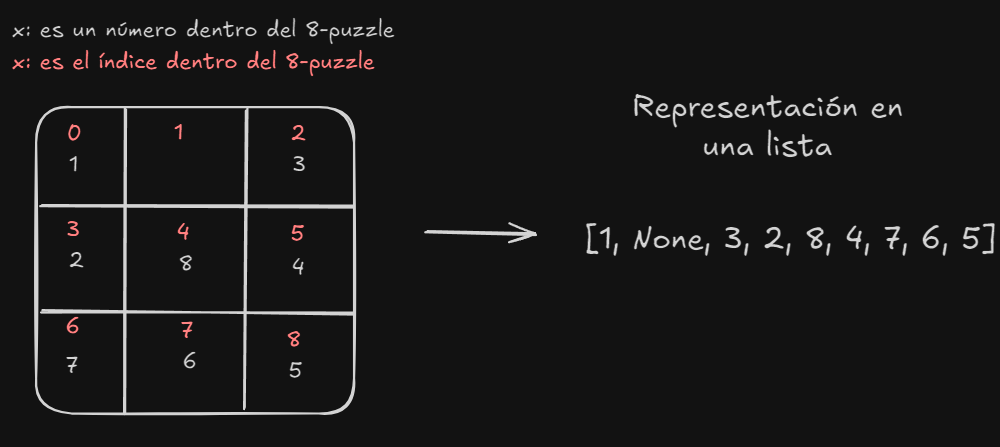

In [52]:
from google.colab import files
from IPython.display import Image
Image('fig1.png')

A su vez, definiremos un estado objetivo arbitrario que será:

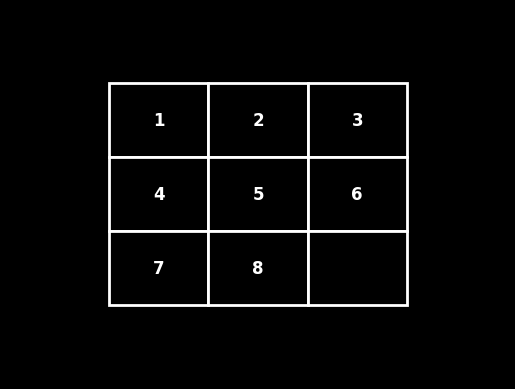

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import random

def draw_puzzle(*args):
    # Create a 3x3 matrix and fill it with the provided numbers
    matrix = np.array(args, dtype=object).reshape(3, 3)

    # Replace None with an empty string for display purposes
    matrix = np.where(matrix == None, '', matrix)

    # Create a figure and axis with black background
    fig, ax = plt.subplots(facecolor='black')

    # Create a table with rounded corners and inverted colors
    table = plt.table(cellText=matrix, loc='center', cellLoc='center', edges='closed')

    # Set the font size and cell height
    table.auto_set_font_size(False)
    table.set_fontsize(14)
    table.scale(1, 2)

    # Hide the axes
    ax.axis('off')

    # Draw rounded corners for each cell with inverted colors
    for key, cell in table.get_celld().items():
        cell.set_edgecolor('white')
        cell.set_linewidth(2)
        cell.set_facecolor('black')
        cell.set_height(0.2)
        cell.set_width(0.2)
        cell.set_text_props(fontsize=12, weight='bold', color='white')

    # Show the plot
    plt.show()
draw_puzzle(1,2,3,4,5,6,7,8,None)

## Número de estados iniciales

Para calcular el número de estados iniciales, se tiene que notar que el orden de los elementos importa y que todos están siendo utilizados. Es por eso que se realiza una permutación de 9, o sea, $9! =  \space $[362880](https://www.wolframalpha.com/input?i2d=true&i=9%21). Y sin considerar el estado objetivo, tendríamos $9! - 1 = 362879$

# Implementación

Utilizaremos una FB como técnica, pues la solución a continuación no es sofisticada y funciona aceptablemente para tamaños pequeños. Generaremos una lista aleatoria con enteros del 1 al 8 y con el vacío (None) (ln. 4-5). Para verificar que este nuevo estado inicial no se ha generado previamente, guardaremos los resultados en una lista auxiliar (ln. 2 & 7) y la recorreremos de manera secuencial para realizar la corroboración (ln. 6).

1: [5, 6, None, 8, 7, 2, 3, 4, 1]


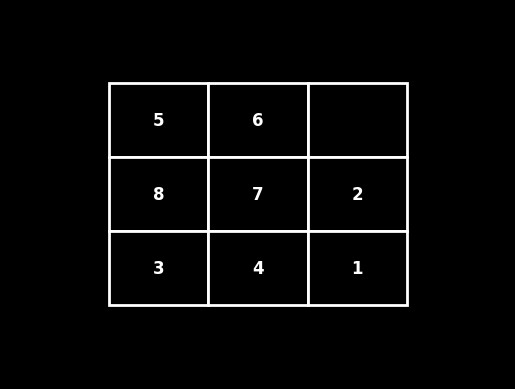


2: [5, 2, 6, 1, 7, None, 4, 3, 8]


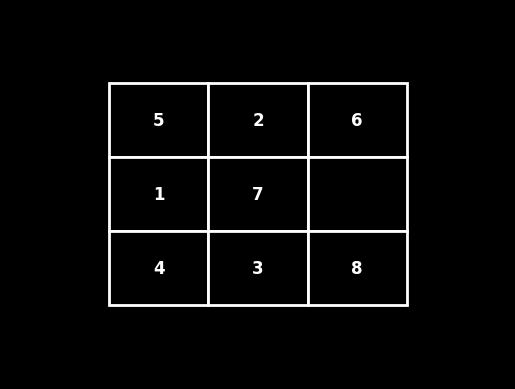


3: [1, None, 2, 7, 6, 8, 4, 5, 3]


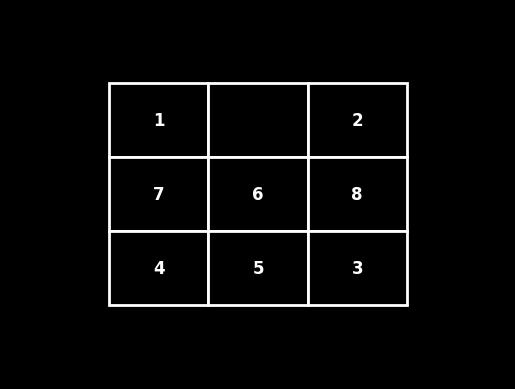


4: [1, 7, 6, 8, None, 5, 2, 3, 4]


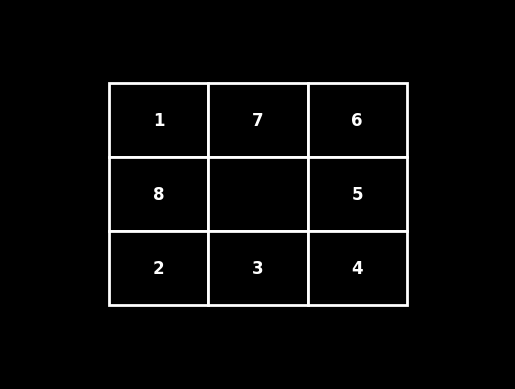


5: [5, None, 2, 6, 1, 4, 7, 3, 8]


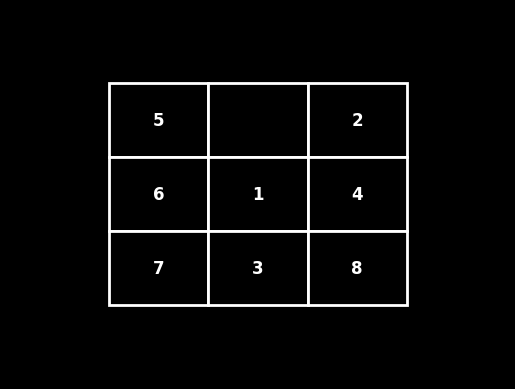


6: [8, 1, 2, 4, 7, None, 3, 5, 6]


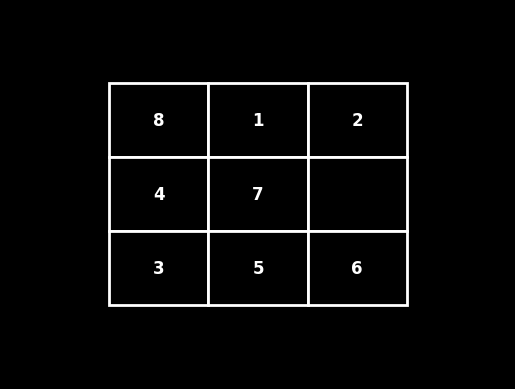


7: [5, None, 4, 6, 1, 3, 2, 8, 7]


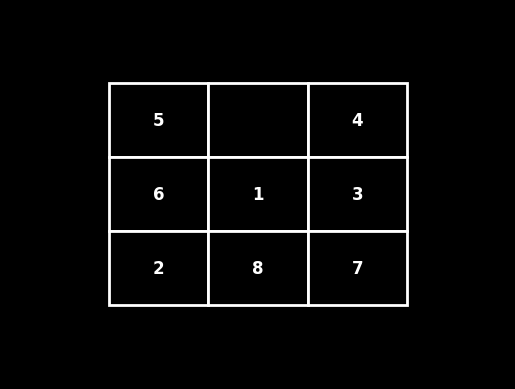


8: [8, 3, 2, 4, None, 5, 7, 6, 1]


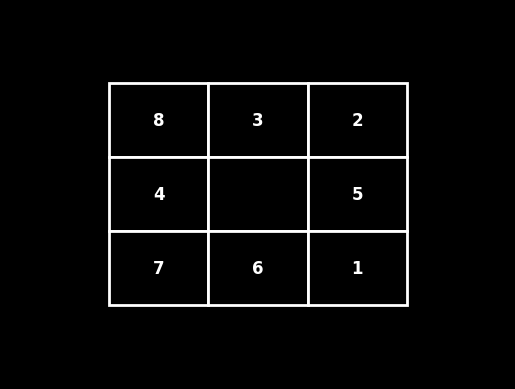


9: [3, 7, 4, 2, 1, None, 6, 5, 8]


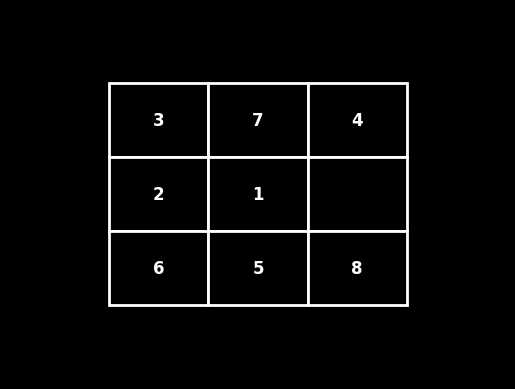


10: [5, 1, None, 2, 7, 6, 3, 8, 4]


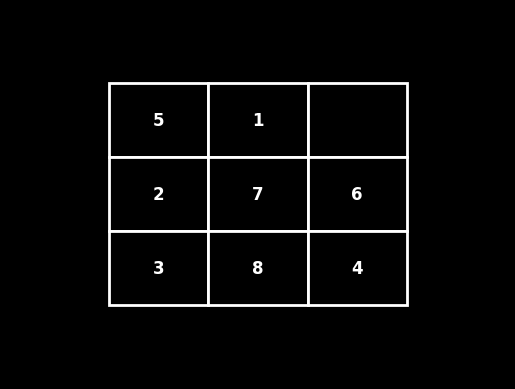


11: [2, 7, 3, 8, 1, 5, None, 4, 6]


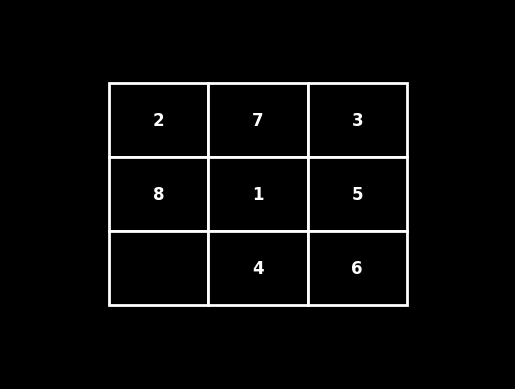

In [51]:
def generate_unique_puzzles(n):
    puzzles = []
    while len(puzzles) < n:
        puzzle = random.sample(range(1, 9), 8) + [None]
        random.shuffle(puzzle)
        if puzzle not in puzzles and puzzle != [1, 2, 3, 4, 5, 6, 7, 8, None]:
            puzzles.append(puzzle)
            print(f"{len(puzzles)}: {puzzle}")
            draw_puzzle(*puzzle)
            print()

def get_positive_integer():
    while True:
        try:
            n = int(input("Ingrese el número de instancias (debe ser un entero positivo): "))
            if n > 0:
                return n
            else:
                print("Por favor, ingrese un número entero positivo.")
        except ValueError:
            print("Entrada no válida. Por favor, ingrese un número entero.")

n = get_positive_integer()

from IPython.display import clear_output
clear_output(wait=True)

generate_unique_puzzles(n)